In [6]:
pip install lyricsgenius

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 918.4 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install profanityfilter

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Top 100 Billboard Songs 2000-2022.xlsx')

In [4]:
df

,Year,Rank,Artist,Song
0,2000,1,Faith Hill,Breathe
1,2000,2,Santana feat. Rob Thomas,Smooth
2,2000,3,Santana feat. The Product GandB,Maria Maria
3,2000,4,Joe,I Wanna Know
4,2000,5,Vertical Horizon,Everything You Want
...,...,...,...,...
2295,2022,96,Ernest featuring Morgan Wallen,Flower Shops
2296,2022,97,Jnr Choi and Sam Tompkins,To the Moon
2297,2022,98,Sam Smith and Kim Petras,Unholy
2298,2022,99,Kane Brown,One Mississippi


# Acknowledgements

- need to check if API takes in just one artist in a song (we can then remove "feat.," "featuring", and "features" and just keep one artist for simplicity
- we need to remove profanity from lyrics in case we make word clouds
- need to see how the API takes in song names, and whether or not they take in apostrophes or other characters

# Testing the API for feature artists

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import lyricsgenius
import re

In [9]:
# initalize API
client_id = '96dcd39191cf46ee81bb5d1092e6716b'
client_secret = '22a0463e07e2485c8fc0a692d3412183'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [10]:
results = sp.search(q='Many Men', type='track')
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Many+Men&type=track&offset=0&limit=10',
  'items': [{'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3q7HBObVc0L8jNeTe5Gofh'},
       'href': 'https://api.spotify.com/v1/artists/3q7HBObVc0L8jNeTe5Gofh',
       'id': '3q7HBObVc0L8jNeTe5Gofh',
       'name': '50 Cent',
       'type': 'artist',
       'uri': 'spotify:artist:3q7HBObVc0L8jNeTe5Gofh'}],
     'available_markets': ['AU',
      'CA',
      'CR',
      'DO',
      'GT',
      'HN',
      'JP',
      'MX',
      'NI',
      'PA',
      'SV',
      'US'],
     'external_urls': {'spotify': 'https://open.spotify.com/album/4ycNE7y1rp5215g1kkqk1P'},
     'href': 'https://api.spotify.com/v1/albums/4ycNE7y1rp5215g1kkqk1P',
     'id': '4ycNE7y1rp5215g1kkqk1P',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273f7f74100d5cc850e01172cbf',
       'width

In [18]:
# Access Genius API
genius_api_key = 'iYtxgNLr8PhZsYubPUAEARAR_tWMscYA41pAv7YGZryANx9-eFThYcDS2pBfvOPoJVD_VsKbsOxlWwq9KUtyHw'
genius = lyricsgenius.Genius(genius_api_key)

# get the track name and artist name
track_name = results['tracks']['items'][0]['name']
artist_name = results['tracks']['items'][0]['artists'][0]['name']

# search for the lyrics using the Genius API
song = genius.search_song(track_name, artist_name)
lyrics = song.lyrics
print(lyrics)

Searching for "Many Men (Wish Death)" by 50 Cent...
Done.
TranslationsРусскийMany Men (Wish Death) Lyrics[Skit: 50 Cent & Lloyd Banks]
Damn, you gotta go get somethin' to eat, man
I'm hungrier than a motherfucker, man
Ayo, man
Damn, what's takin' homie so long, son?
50, calm down, man, he coming
Ah! (Oh, what the fuck?)
Ah, son, pull off, pull off!

[Intro: 50 Cent]
Many men wish death upon me
Blood in my eye, dawg, and I can't see
I'm tryin' to be what I'm destined to be
And niggas tryin' to take my life away (C'mon)
I put a hole in a nigga for fuckin' with me
My back on the wall, now you gon' see
Better watch how you talk when you talk about me
'Cause I'll come and take your life away
[Chorus: 50 Cent]
Many men
Many, many, many, many men
Wish death 'pon me
Lord, I don't cry no more
Don't look to the sky no more
Have mercy on me

[Verse 1: 50 Cent]
Now man, these pussy niggas puttin' money on my head
Go on and get your refund, motherfucker, I ain't dead
I'm the diamond in the dirt tha

In [21]:
# testing out the capabiltiy with the dartaset
artist_name = df['Artist'][0]
print(artist_name)

track_name = df['Song'][0]
print(track_name)

# search for the lyrics using the Genius API
song = genius.search_song(track_name, artist_name)
lyrics = song.lyrics
print(lyrics)

Faith Hill
Breathe
Searching for "Breathe" by Faith Hill...
Done.
Breathe Lyrics[Intro]
I can feel the magic floating in the air
Being with you gets me that way
I watch the sunlight dance across your face and I've
Never been this swept away

[Verse 1]
All my thoughts just seem to settle on the breeze
When I'm lying wrapped up in your arms
The whole world just fades away
The only thing I hear
Is the beating of your heart
[Chorus]
And I can feel you breathe, it's washing over me
And suddenly, I'm melting into you
There's nothing left to prove
Baby, all we need is just to be
Caught up in the touch, slow and steady rush
Baby, isn't that the way that love's supposed to be?
I can feel you breathe
Just breathe

[Verse 2]
In a way, I know my heart is waking up
As all the walls come tumbling down
I'm closer than I've ever felt before
And I know, and you know
There's no need for words right now

[Chorus]
And I can feel you breathe, it's washing over me
And suddenly, I'm melting into you
There's 

In [23]:
# testing 2, 2000, 3, ARTIST: Santana feat. The Product GandB SONG: Maria Maria

# testing out the capabiltiy with the dartaset
artist_name = df['Artist'][2]
print(artist_name)

track_name = df['Song'][2]
print(track_name)

# search for the lyrics using the Genius API
song = genius.search_song(track_name, artist_name)
lyrics = song.lyrics
print(lyrics)

Santana feat. The Product GandB
Maria Maria
Searching for "Maria Maria" by Santana feat. The Product GandB...
No results found for: 'Maria Maria Santana feat. The Product GandB'


AttributeError: 'NoneType' object has no attribute 'lyrics'

In [24]:
artist_name

'Santana feat. The Product GandB'

In [26]:
def get_artist_name(artist):
    """ gets the singular artist without features
    
    args:
        artist(str): artist name with features
        
    returns:
        artist(str): artist name without features"""
    
    # remove feature
    artist = artist.split('feat')[0].strip()

    return artist


In [33]:
# testing out the api with just the singular artist
artist_name = get_artist_name(artist_name)

print(artist_name)

track_name = df['Song'][2]
print(track_name)

# search for the lyrics using the Genius API
song = genius.search_song(track_name, artist_name)
lyrics = song.lyrics
print(lyrics)
print(type(lyrics))

Santana
Maria Maria
Searching for "Maria Maria" by Santana...
Done.
Maria Maria Lyrics[Intro: Wyclef Jean]
Ladies and gents, turn up your sound systems to the sound of Carlos Santana and the G&B, it's The Product of Ghetto Blues from the Refugee Camp

[Chorus: David McRae]
Oh, Maria, Maria
She reminds me of a west side story
Growing up in Spanish Harlem
She's living the life just like a movie star
Oh, Maria, Maria
She fell in love in East L.A
To the sounds of the guitar, yeah, yeah
Played by Carlos Santana
[Guitar Solo: Carlos Santana]

[Verse 1: David McRae]
Stop the looting, stop the shooting
Pick pock'ing on the corner
See as the rich is getting richer
The poor is getting poorer
Se mira Maria on the corner
Thinking of ways to make it better
In my mailbox, there's an eviction letter
Signed by the judge, said see you later
[Pre-Chorus: Santana & Wyclef Jean]
Ahora vengo mama chula, mama chula
Ahora vengo mama chula (East Coast)
Ahora vengo mama chula, mama chula
Ahora vengo mama chula

# Removing profanity within the lyrics

using this package  https://pypi.org/project/profanity-filter/

In [32]:
from profanityfilter import ProfanityFilter

pf = ProfanityFilter()

pf.censor("That's bullshit!")
# "That's ********!"

"That's ********!"

In [46]:
# Access Genius API
genius_api_key = 'iYtxgNLr8PhZsYubPUAEARAR_tWMscYA41pAv7YGZryANx9-eFThYcDS2pBfvOPoJVD_VsKbsOxlWwq9KUtyHw'
genius = lyricsgenius.Genius(genius_api_key)

# get the track name and artist name
track_name = results['tracks']['items'][0]['name']
artist_name = results['tracks']['items'][0]['artists'][0]['name']

# search for the lyrics using the Genius API
song = genius.search_song(track_name, artist_name)
lyrics = song.lyrics
print(lyrics)

Searching for "Many Men (Wish Death)" by 50 Cent...
Done.
TranslationsРусскийMany Men (Wish Death) Lyrics[Skit: 50 Cent & Lloyd Banks]
Damn, you gotta go get somethin' to eat, man
I'm hungrier than a motherfucker, man
Ayo, man
Damn, what's takin' homie so long, son?
50, calm down, man, he coming
Ah! (Oh, what the fuck?)
Ah, son, pull off, pull off!

[Intro: 50 Cent]
Many men wish death upon me
Blood in my eye, dawg, and I can't see
I'm tryin' to be what I'm destined to be
And niggas tryin' to take my life away (C'mon)
I put a hole in a nigga for fuckin' with me
My back on the wall, now you gon' see
Better watch how you talk when you talk about me
'Cause I'll come and take your life away
[Chorus: 50 Cent]
Many men
Many, many, many, many men
Wish death 'pon me
Lord, I don't cry no more
Don't look to the sky no more
Have mercy on me

[Verse 1: 50 Cent]
Now man, these pussy niggas puttin' money on my head
Go on and get your refund, motherfucker, I ain't dead
I'm the diamond in the dirt tha

In [47]:
pf = ProfanityFilter()

clean_lyrics = pf.censor(lyrics)

print(clean_lyrics)

TranslationsРусскийMany Men (Wish Death) Lyrics[Skit: 50 Cent & Lloyd Banks]
****, you gotta go get somethin' to eat, man
I'm hungrier than a ************, man
Ayo, man
****, what's takin' homie so long, son?
50, calm down, man, he coming
Ah! (Oh, what the ****?)
Ah, son, pull off, pull off!

[Intro: 50 Cent]
Many men wish death upon me
Blood in my eye, dawg, and I can't see
I'm tryin' to be what I'm destined to be
And ****** tryin' to take my life away (C'mon)
I put a hole in a ***** for ******' with me
My back on the wall, now you gon' see
Better watch how you talk when you talk about me
'Cause I'll come and take your life away
[Chorus: 50 Cent]
Many men
Many, many, many, many men
Wish death 'pon me
Lord, I don't cry no more
Don't look to the sky no more
Have mercy on me

[Verse 1: 50 Cent]
Now man, these ***** ****** puttin' money on my head
Go on and get your refund, ************, I ain't dead
I'm the diamond in the dirt that ain't been found
I'm the underground king and I ain't be

# Takeaways

we need to remove:
- extra line spacing
- verse, chorus and intro calls
- parentheses
- translations
- any pre song text

In [62]:
def clean_lyric(string):
    """ cleans the lyrics """
    string = string.replace("*", "")
    string = string.replace(",", "")
    string = string.replace("!", "")
    string = string.replace("?", "")
    string = string.replace("'", "")
    string = string.replace("(", "")
    string = string.replace(")", "")
    string = string.replace("-", "")
    
    return string
    

In [63]:
clean_lyrics = clean_lyric(clean_lyrics)
print(clean_lyrics)

translationsрусскийmany men wish death lyrics[skit: 50 cent & lloyd banks]
 you gotta go get somethin to eat man
im hungrier than a  man
ayo man
 whats takin homie so long son
50 calm down man he coming
ah oh what the 
ah son pull off pull off

[intro: 50 cent]
many men wish death upon me
blood in my eye dawg and i cant see
im tryin to be what im destined to be
and  tryin to take my life away cmon
i put a hole in a  for  with me
my back on the wall now you gon see
better watch how you talk when you talk about me
cause ill come and take your life away
[chorus: 50 cent]
many men
many many many many men
wish death pon me
lord i dont cry no more
dont look to the sky no more
have mercy on me

[verse 1: 50 cent]
now man these   puttin money on my head
go on and get your refund  i aint dead
im the diamond in the dirt that aint been found
im the underground king and i aint been crowned
when i rhyme somethin special happened every time
im the greatest somethin like ali in his prime
i walk the b

In [64]:
def lower_song(lyrics):
    """ returns the lyrics in lowercase 
    
    args:
        lyrics(str): the lyrics
        
    returns:
        lyrics(str): lowercased lyrics """
    
    lyrics = lyrics.lower()
    
    return lyrics

In [65]:
clean_lyrics = lower_song(clean_lyrics)
print(clean_lyrics)

translationsрусскийmany men wish death lyrics[skit: 50 cent & lloyd banks]
 you gotta go get somethin to eat man
im hungrier than a  man
ayo man
 whats takin homie so long son
50 calm down man he coming
ah oh what the 
ah son pull off pull off

[intro: 50 cent]
many men wish death upon me
blood in my eye dawg and i cant see
im tryin to be what im destined to be
and  tryin to take my life away cmon
i put a hole in a  for  with me
my back on the wall now you gon see
better watch how you talk when you talk about me
cause ill come and take your life away
[chorus: 50 cent]
many men
many many many many men
wish death pon me
lord i dont cry no more
dont look to the sky no more
have mercy on me

[verse 1: 50 cent]
now man these   puttin money on my head
go on and get your refund  i aint dead
im the diamond in the dirt that aint been found
im the underground king and i aint been crowned
when i rhyme somethin special happened every time
im the greatest somethin like ali in his prime
i walk the b

In [69]:
# Remove lines containing 'chorus', 'verse', or 'solo'
lyrics = '\n'.join([line for line in clean_lyrics.split('\n') if 'chorus' not in line.lower()\
                    and 'verse' not in line.lower()\
                    and 'solo' not in line.lower()\
                    and 'intro' not in line.lower()\
                    and 'skit' not in line.lower()\
                    and 'translation' not in line.lower()])

print(lyrics)

 you gotta go get somethin to eat man
im hungrier than a  man
ayo man
 whats takin homie so long son
50 calm down man he coming
ah oh what the 
ah son pull off pull off

many men wish death upon me
blood in my eye dawg and i cant see
im tryin to be what im destined to be
and  tryin to take my life away cmon
i put a hole in a  for  with me
my back on the wall now you gon see
better watch how you talk when you talk about me
cause ill come and take your life away
many men
many many many many men
wish death pon me
lord i dont cry no more
dont look to the sky no more
have mercy on me

now man these   puttin money on my head
go on and get your refund  i aint dead
im the diamond in the dirt that aint been found
im the underground king and i aint been crowned
when i rhyme somethin special happened every time
im the greatest somethin like ali in his prime
i walk the block with the bundles ive been knocked on the humble
swing the ox when i rumble show your  what my gun do
got a temper  go head l

In [72]:
def clean_string(string):
    # Convert the string to lowercase
    string = string.lower()

    # Remove all newlines and extra whitespaces
    string = ' '.join(string.split())

    # Remove all punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for char in string:
        if char in punctuations:
            string = string.replace(char, '')

    return string


In [74]:
print(clean_string(lyrics))

you gotta go get somethin to eat man im hungrier than a man ayo man whats takin homie so long son 50 calm down man he coming ah oh what the ah son pull off pull off many men wish death upon me blood in my eye dawg and i cant see im tryin to be what im destined to be and tryin to take my life away cmon i put a hole in a for with me my back on the wall now you gon see better watch how you talk when you talk about me cause ill come and take your life away many men many many many many men wish death pon me lord i dont cry no more dont look to the sky no more have mercy on me now man these puttin money on my head go on and get your refund i aint dead im the diamond in the dirt that aint been found im the underground king and i aint been crowned when i rhyme somethin special happened every time im the greatest somethin like ali in his prime i walk the block with the bundles ive been knocked on the humble swing the ox when i rumble show your what my gun do got a temper go head lose your head 

In [55]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'of', 'him', 'is', 'we', 'can', 'are', 'each', 'but', 'ma', 'as', 'only', "that'll", 'both', 'were', 'hadn', "wasn't", 's', 're', 'too', 'between', 've', 'shan', 'through', "didn't", 'am', 'up', "shouldn't", 'herself', "wouldn't", 'doing', 'again', 'from', 'with', 'on', 'where', 'why', "won't", 'further', 'does', 'y', 'at', "don't", 'just', "hasn't", 'wasn', "you'd", "couldn't", 'be', 'themselves', 'do', 'did', 'any', "isn't", "aren't", 'ours', 'while', 'yourself', 'those', 'will', 'doesn', 'this', 'that', 'have', "shan't", 'if', 'and', 'then', 'now', 'these', 'in', 'our', 'when', 'which', 'after', 'most', 'so', 't', 'hers', 'll', 'by', "she's", 'didn', 'ain', "mightn't", 'before', 'aren', 'o', 'been', 'you', 'for', 'such', 'should', 'having', 'mustn', 'same', 'wouldn', 'below', 'ourselves', 'a', 'was', "it's", 'down', 'haven', 'out', 'during', 'mightn', "weren't", 'isn', 'he', "should've", 'their', 'against', 'shouldn', 'me', 'an', 'how', 'other', 'd', 'his', 'off', 'the', 'don', 'ab

In [80]:
lyric_list = [word for word in lyrics.split() if word not in (stops)]
lyric_list

['gotta',
 'go',
 'get',
 'somethin',
 'eat',
 'man',
 'im',
 'hungrier',
 'man',
 'ayo',
 'man',
 'whats',
 'takin',
 'homie',
 'long',
 'son',
 '50',
 'calm',
 'man',
 'coming',
 'ah',
 'oh',
 'ah',
 'son',
 'pull',
 'pull',
 'many',
 'men',
 'wish',
 'death',
 'upon',
 'blood',
 'eye',
 'dawg',
 'cant',
 'see',
 'im',
 'tryin',
 'im',
 'destined',
 'tryin',
 'take',
 'life',
 'away',
 'cmon',
 'put',
 'hole',
 'back',
 'wall',
 'gon',
 'see',
 'better',
 'watch',
 'talk',
 'talk',
 'cause',
 'ill',
 'come',
 'take',
 'life',
 'away',
 'many',
 'men',
 'many',
 'many',
 'many',
 'many',
 'men',
 'wish',
 'death',
 'pon',
 'lord',
 'dont',
 'cry',
 'dont',
 'look',
 'sky',
 'mercy',
 'man',
 'puttin',
 'money',
 'head',
 'go',
 'get',
 'refund',
 'aint',
 'dead',
 'im',
 'diamond',
 'dirt',
 'aint',
 'found',
 'im',
 'underground',
 'king',
 'aint',
 'crowned',
 'rhyme',
 'somethin',
 'special',
 'happened',
 'every',
 'time',
 'im',
 'greatest',
 'somethin',
 'like',
 'ali',
 'prime'

In [96]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(text_list):
    """ creating a word cloud
    
    args:
        text_list(list): list
        
    returns:
        a wordcloud """
    
    # count word count
    word_counts = Counter(text_list)
    
    # create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white")
    
    # generate it based off of frequency
    wordcloud.generate_from_frequencies(word_counts)
    
    # create figure
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


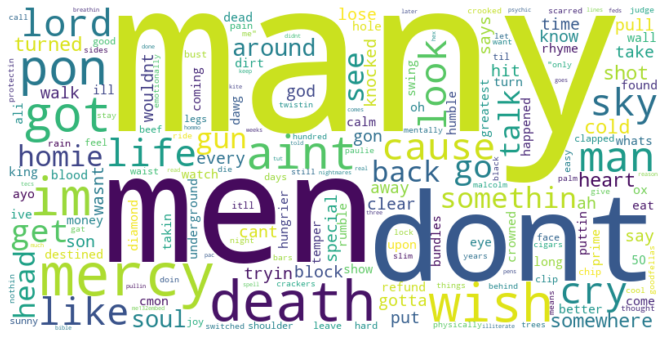

In [97]:
# create word cloud
create_word_cloud(lyric_list)